Train shape: (16000, 2)
Validation shape: (2000, 2)
Test shape: (2000, 2)
Emotion Classes: ['anger' 'fear' 'joy' 'love' 'sadness' 'surprise']


C:\Users\ranje\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3214 - loss: 1.6010 - val_accuracy: 0.3520 - val_loss: 1.5902
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3406 - loss: 1.5650 - val_accuracy: 0.3575 - val_loss: 1.4895
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4619 - loss: 1.3586 - val_accuracy: 0.3615 - val_loss: 1.3317
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6949 - loss: 0.8007 - val_accuracy: 0.7270 - val_loss: 0.6689
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7909 - loss: 0.5548 - val_accuracy: 0.8460 - val_loss: 0.4820
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8627 - loss: 0.3983 - val_accuracy: 0.7340 - val_loss: 0.8770
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8690 - loss: 0.3774 - val_accuracy: 0.8780 - val_loss: 0.4166
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9189 - loss: 0.2451 - val_accuracy: 0.

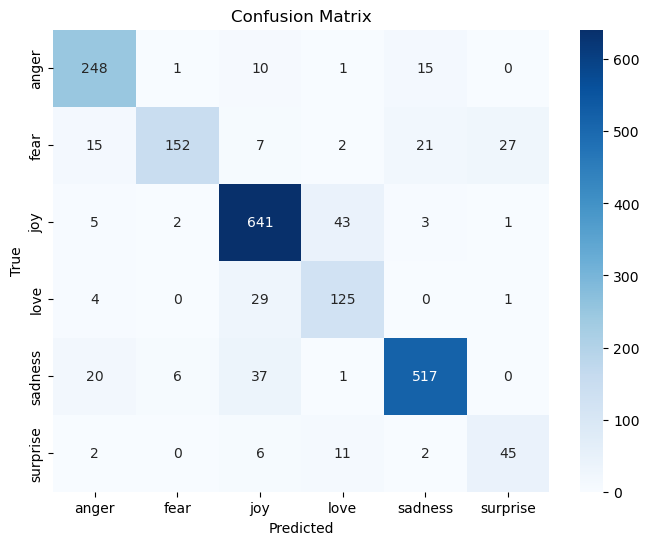

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
joy


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, GlobalAveragePooling1D
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# ----------------------
# 1. Load Dataset
# ----------------------
train_df = pd.read_csv("C:/Users/ranje/OneDrive/Desktop/train.txt", sep=";", header=None, names=["text", "label"])
val_df   = pd.read_csv("C:/Users/ranje/OneDrive/Desktop/val.txt", sep=";", header=None, names=["text", "label"])
test_df  = pd.read_csv("C:/Users/ranje/OneDrive/Desktop/test.txt", sep=";", header=None, names=["text", "label"])

print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)

# ----------------------
# 2. Encode Labels
# ----------------------
le = LabelEncoder()
train_df["label"] = le.fit_transform(train_df["label"])
val_df["label"]   = le.transform(val_df["label"])
test_df["label"]  = le.transform(test_df["label"])

num_classes = len(le.classes_)
print("Emotion Classes:", le.classes_)

# ----------------------
# 3. Tokenization
# ----------------------
max_words = 10000  # vocab size
max_len   = 100    # max sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df["text"])

X_train = pad_sequences(tokenizer.texts_to_sequences(train_df["text"]), maxlen=max_len)
X_val   = pad_sequences(tokenizer.texts_to_sequences(val_df["text"]), maxlen=max_len)
X_test  = pad_sequences(tokenizer.texts_to_sequences(test_df["text"]), maxlen=max_len)

y_train = pd.get_dummies(train_df["label"]).values
y_val   = pd.get_dummies(val_df["label"]).values
y_test  = pd.get_dummies(test_df["label"]).values

# ----------------------
# 4. Build Model
# ----------------------
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

# ----------------------
# 5. Train Model
# ----------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)

# ----------------------
# 6. Evaluate Model
# ----------------------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(acc*100))

# Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ----------------------
# 7. Prediction Function
# ----------------------
def predict_emotion(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=max_len)
    pred = model.predict(pad)
    return le.classes_[np.argmax(pred)]

# Example
print(predict_emotion("I am feeling very happy today!"))


In [4]:
print(predict_emotion("lets go to party"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
joy
